In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.xlsx to test.xlsx
Saving train.xlsx to train.xlsx


In [119]:
dftest = pd.read_excel("test.xlsx")

In [120]:
dftest.shape

(1500, 39)

In [121]:
df = pd.read_excel("train.xlsx")

In [122]:
df.shape

(3998, 39)

In [123]:
df.head(5)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [124]:
df = df.drop(['CollegeID','DOB','10board','12board','12graduation','DOJ','DOL','CollegeCityID','CollegeCityTier',
              'CollegeState','Designation','Unnamed: 0','JobCity'], axis=1)

In [125]:
df.head(5)

,ID,Salary,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,f,84.3,95.8,2,B.Tech/B.E.,computer engineering,78.00,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,m,85.4,85.0,2,B.Tech/B.E.,electronics and communication engineering,70.06,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,f,85.0,68.2,2,B.Tech/B.E.,information technology,70.00,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,m,85.6,83.6,1,B.Tech/B.E.,computer engineering,74.64,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,m,78.0,76.8,2,B.Tech/B.E.,electronics and communication engineering,73.90,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [126]:
df.shape

(3998, 26)

In [127]:
df.describe()

,ID,Salary,10percentage,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,74.466366,1.925713,71.486171,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,10.999933,0.262270,8.167338,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,40.000000,1.000000,6.450000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,66.000000,2.000000,66.407500,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,74.400000,2.000000,71.720000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,82.600000,2.000000,76.327500,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,98.700000,2.000000,99.930000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [128]:
df.isin([-1, 'NaN']).sum() #finding number of null values

ID                          0
Salary                      0
Gender                      0
10percentage                0
12percentage                0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [129]:
domain = ['Domain',
          'ComputerProgramming',
          'ElectronicsAndSemicon',
          'ComputerScience',
          'MechanicalEngg',
          'ElectricalEngg',
          'TelecomEngg',
          'CivilEngg']
for k in domain:
    df[k].replace(to_replace = -1, value = 0, inplace = True)

In [130]:
df.isin([-1, 'NaN']).sum()

ID                       0
Salary                   0
Gender                   0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [131]:
df.head(5)

,ID,Salary,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,f,84.3,95.8,2,B.Tech/B.E.,computer engineering,78.00,2011,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,m,85.4,85.0,2,B.Tech/B.E.,electronics and communication engineering,70.06,2012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,f,85.0,68.2,2,B.Tech/B.E.,information technology,70.00,2014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,m,85.6,83.6,1,B.Tech/B.E.,computer engineering,74.64,2011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,m,78.0,76.8,2,B.Tech/B.E.,electronics and communication engineering,73.90,2012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


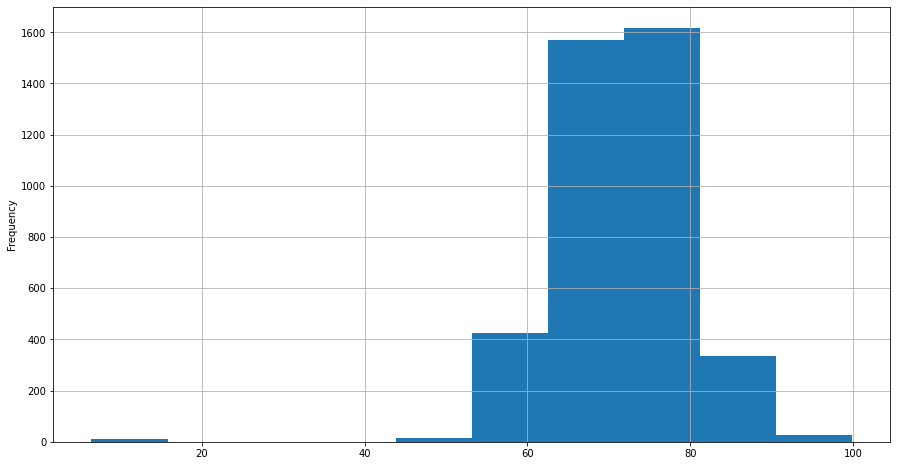

In [132]:
df['collegeGPA'].plot(kind = 'hist', figsize = (15, 8), grid = True)

In [133]:
df.loc[df['collegeGPA'] <= 10, 'collegeGPA'] *= 10

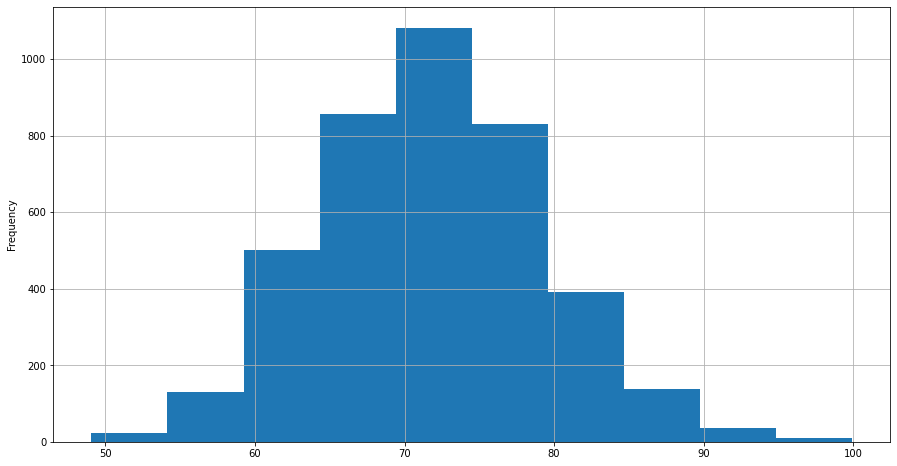

In [134]:
df['collegeGPA'].plot(kind = 'hist', figsize = (15, 8), grid = True)

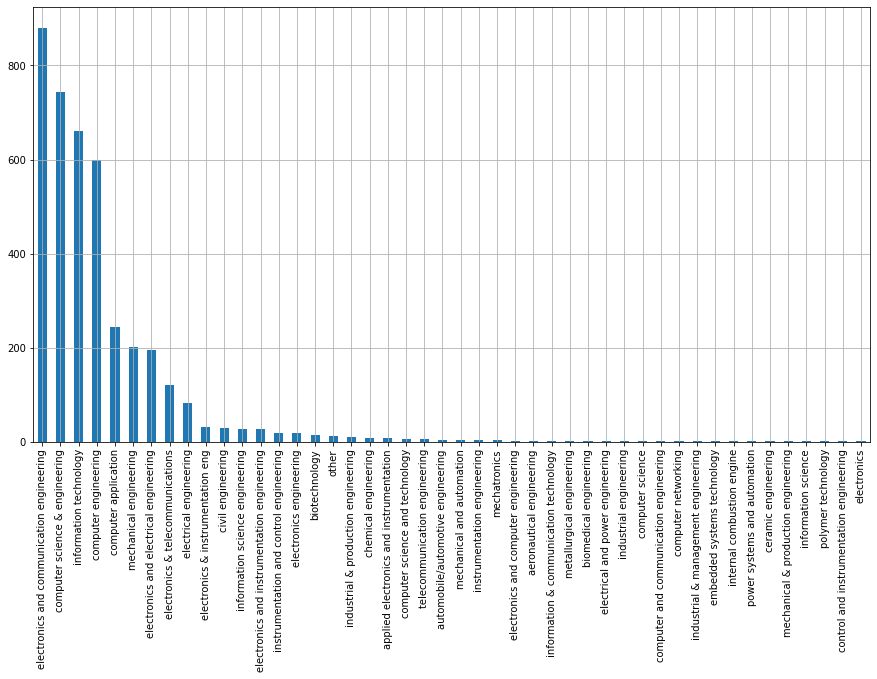

In [135]:
spec_freq = df['Specialization'].value_counts()
spec_freq.plot(kind = 'bar', figsize = (15, 8), grid = True)

In [136]:
spec_map = \
{'electronics and communication engineering' : 'ECE',
 'computer science & engineering' : 'CSE',
 'information technology' : 'CSE' ,
 'computer engineering' : 'CSE',
 'computer application' : 'CSE',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'ECE',
 'electronics & telecommunications' : 'ECE',
 'electrical engineering' : 'ELE',
 'electronics & instrumentation eng' : 'ECE',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'ECE',
 'information science engineering' : 'CSE',
 'instrumentation and control engineering' : 'ECE',
 'electronics engineering' : 'ECE',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'ECE',
 'computer science and technology' : 'CSE',
 'telecommunication engineering' : 'ECE',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'ECE',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CSE',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CSE',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'ECE',
 'electrical and power engineering' : 'ELE',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CSE',
 'embedded systems technology' : 'ECE',
 'power systems and automation' : 'ELE',
 'computer and communication engineering' : 'CSE',
 'information science' : 'CSE',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'ECE',
 'polymer technology' : 'other',
 'electronics' : 'ECE'}

In [137]:
df['Specialization'] = df['Specialization'].map(spec_map)

In [138]:
df.head(5)

,ID,Salary,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,f,84.3,95.8,2,B.Tech/B.E.,CSE,78.00,2011,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,m,85.4,85.0,2,B.Tech/B.E.,ECE,70.06,2012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,f,85.0,68.2,2,B.Tech/B.E.,CSE,70.00,2014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,m,85.6,83.6,1,B.Tech/B.E.,CSE,74.64,2011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,m,78.0,76.8,2,B.Tech/B.E.,ECE,73.90,2012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


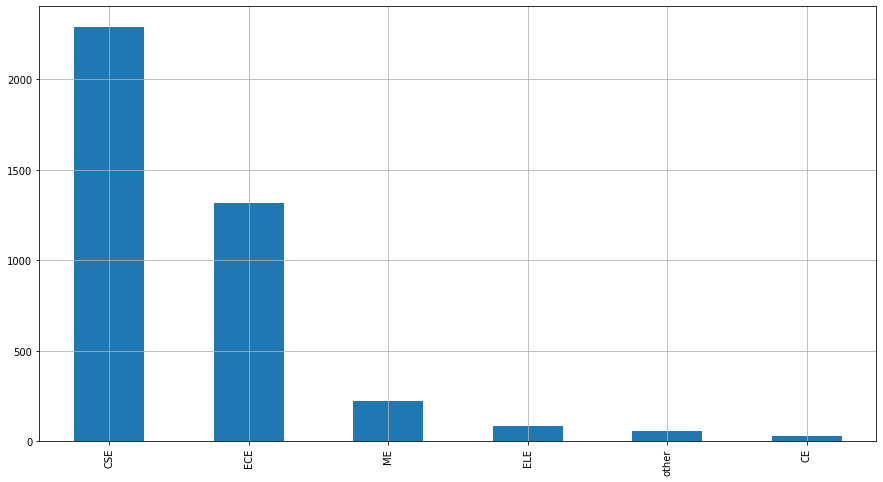

In [139]:
df['Specialization'].value_counts().plot(kind = 'bar', figsize = (15, 8), grid = True)

Number of males and females

In [140]:
n_males = df['Gender'].where(df['Gender'] == 'm').count()
n_females = df['Gender'].where(df['Gender'] == 'f').count()

g = {'Male':[n_males],
        'Female':[n_females] , 'M/F Ratio':[n_males/n_females] }

gender = pd.DataFrame(g)
gender

,Male,Female,M/F Ratio
0,3041,957,3.177638


10th percentage distribution

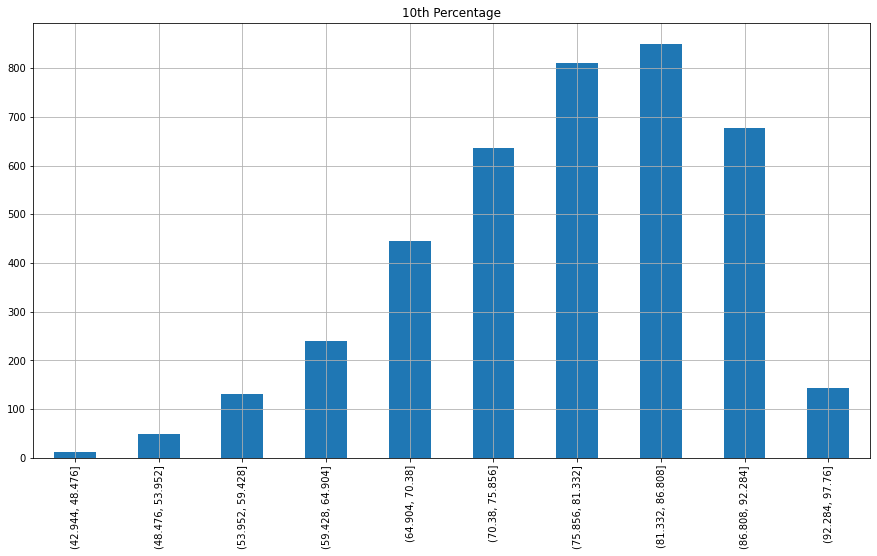

In [141]:
df['10percentage'].value_counts(bins = 10, sort = False).plot(kind = 'bar', title = '10th Percentage', figsize = (15, 8), grid = True)

12th percentage distribution

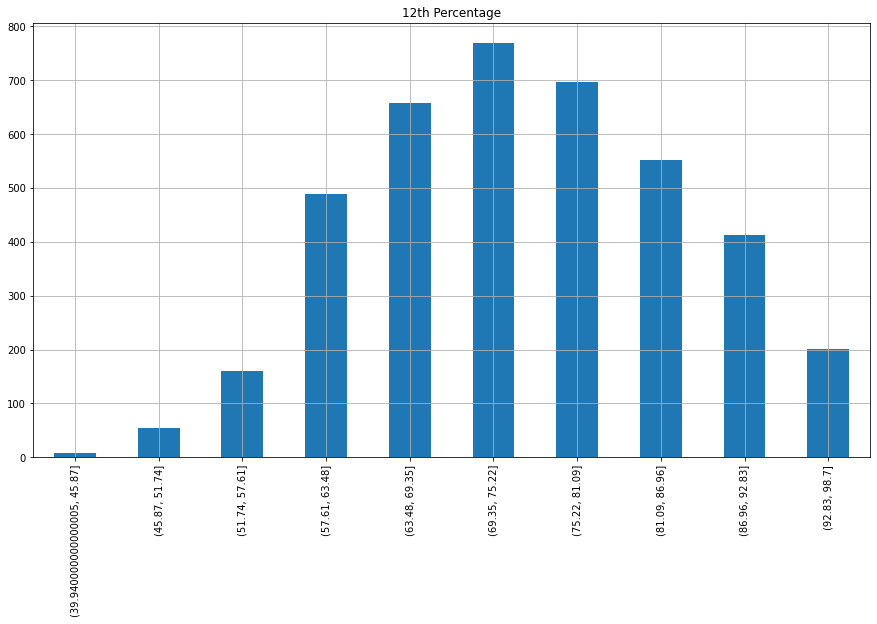

In [142]:
df['12percentage'].value_counts(bins = 10, sort = False).plot(kind = 'bar', title = '12th Percentage', figsize = (15, 8), grid = True)

collegeGPA distribution

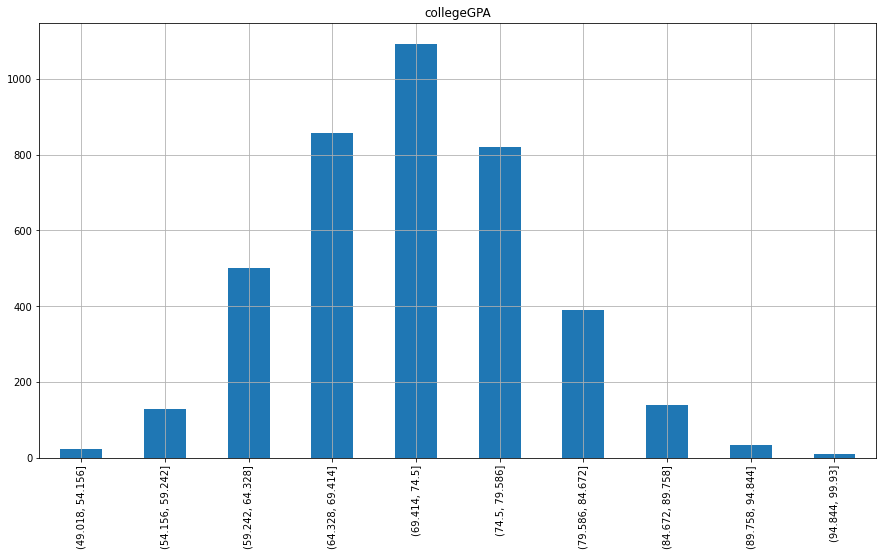

In [143]:
df['collegeGPA'].value_counts(bins = 10, sort = False).plot(kind = 'bar', title = 'collegeGPA', figsize = (15, 8), grid = True)

Salary Distribution

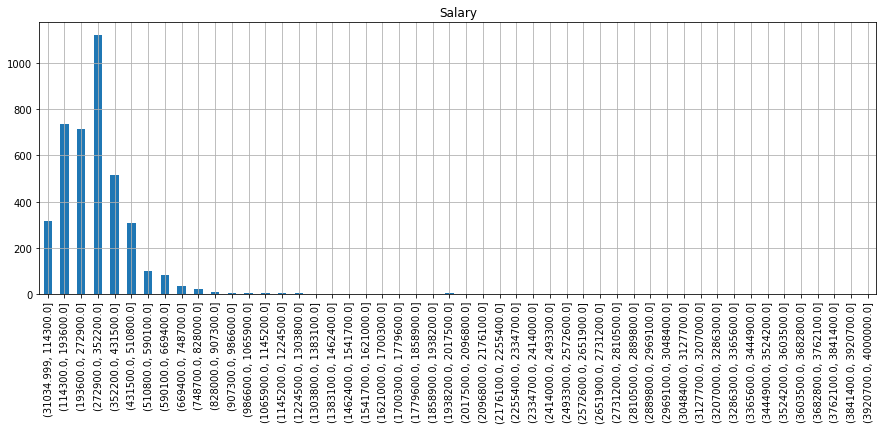

In [144]:
df['Salary'].value_counts(bins = 50, sort = False).plot(kind = 'bar', title = 'Salary', figsize = (15, 5), grid = True)

Correlation of 10th percentage , 12th percentage , college GPA and Salary 

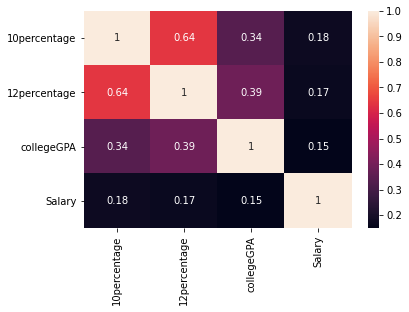

In [145]:
d = df[['10percentage',
                   '12percentage',
                   'collegeGPA','Salary']]
corrMatrix1 = d.corr()
sns.heatmap(corrMatrix1, annot=True)

Correlation of personality scores

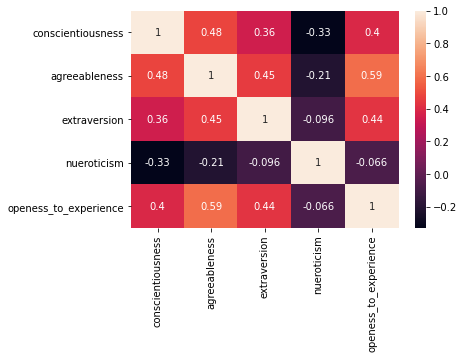

In [146]:
personality = df[['conscientiousness',
                'agreeableness',
                'extraversion',
                'nueroticism',
                'openess_to_experience']]
corrMatrix2 = personality.corr()
sns.heatmap(corrMatrix2, annot=True)


Correlation of Standar Test Scores

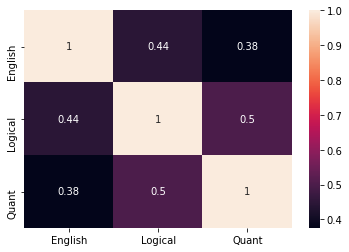

In [147]:
std_test = df[['English',
                   'Logical',
                   'Quant']]
corrMatrix3 = std_test.corr()
sns.heatmap(corrMatrix3, annot=True)

Distribution of College Tier

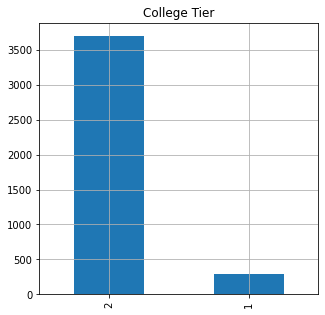

In [148]:
df['CollegeTier'].value_counts().plot(kind = 'bar', title = 'College Tier', figsize = (5, 5), grid = True)

Distribution of awarded degree

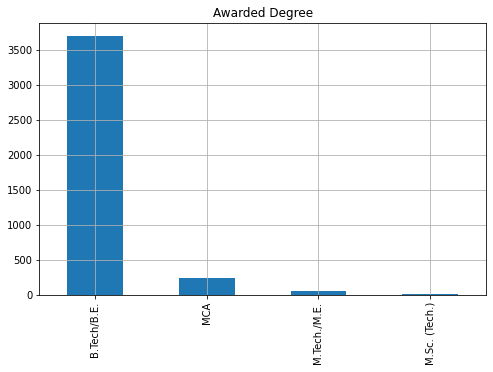

In [149]:
df['Degree'].value_counts().plot(kind = 'bar', title = 'Awarded Degree', figsize = (8, 5), grid = True)

Distribution of Gender

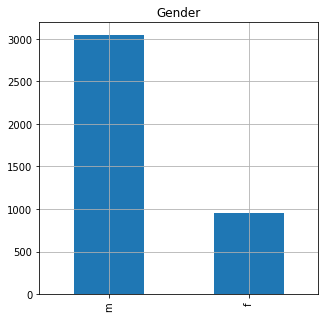

In [150]:
df['Gender'].value_counts().plot(kind = 'bar', title = 'Gender', figsize = (5, 5), grid = True)

Distribution of Graduation Year

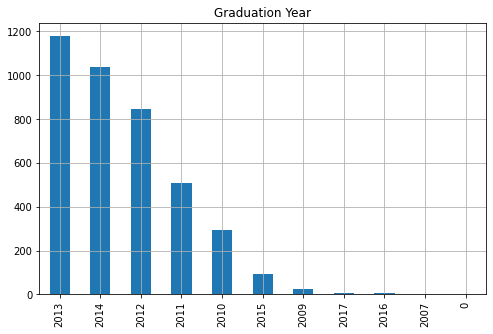

In [151]:
df['GraduationYear'].value_counts().plot(kind = 'bar', title = 'Graduation Year', figsize = (8, 5), grid = True)

Does gender affect salaries of graduates?

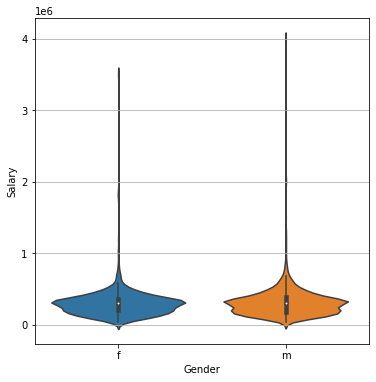

In [152]:
ax = plt.figure(figsize = (6, 6))
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'Gender', y = 'Salary', data = df)

Does year of graduation affect salaries of graduates?

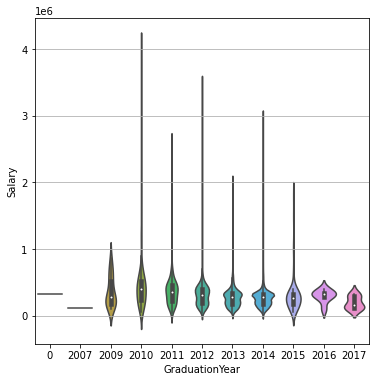

In [153]:
ax = plt.figure(figsize = (6, 6))
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'GraduationYear', y = 'Salary', data = df)

Does degree awarded affect salaries of graduates?

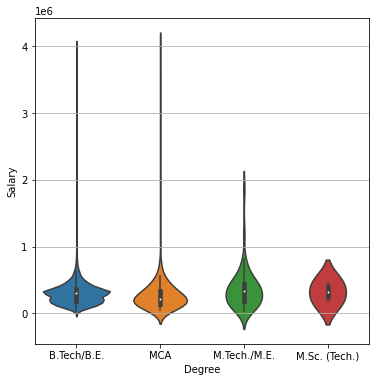

In [154]:
ax = plt.figure(figsize = (6, 6))
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'Degree', y = 'Salary', data = df)

In [155]:
category =['Gender',
               'CollegeTier',
               'Degree',
               'Specialization',
               'GraduationYear']

In [156]:
for i in category:
    unique = len(df[i].unique())
    print("{}: {}".format(i, unique))

Gender: 2
CollegeTier: 2
Degree: 4
Specialization: 6
GraduationYear: 11


In [157]:
for feature in category:
    df = pd.get_dummies(df, prefix = feature, columns = [feature])

In [158]:
df.head(5)

,ID,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Gender_f,Gender_m,CollegeTier_1,CollegeTier_2,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_CE,Specialization_CSE,Specialization_ECE,Specialization_ELE,Specialization_ME,Specialization_other,GraduationYear_0,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017
0,203097,420000,84.3,95.8,78.00,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,579905,500000,85.4,85.0,70.06,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,810601,325000,85.0,68.2,70.00,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,267447,1100000,85.6,83.6,74.64,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,343523,200000,78.0,76.8,73.90,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [160]:
X = df.drop(['Salary','ID'], axis = 1)
X.head(5)

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Gender_f,Gender_m,CollegeTier_1,CollegeTier_2,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_CE,Specialization_CSE,Specialization_ECE,Specialization_ELE,Specialization_ME,Specialization_other,GraduationYear_0,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017
0,84.3,95.8,78.00,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,85.4,85.0,70.06,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,85.0,68.2,70.00,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,85.6,83.6,74.64,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,78.0,76.8,73.90,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [161]:
Y= df['Salary']
Y.head(5)

0     420000
1     500000
2     325000
3    1100000
4     200000
Name: Salary, dtype: int64

##LINEAR REGRESSION

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [163]:
Lr = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

Lr.fit(X_train,Y_train)

Y_train_pred = Lr.predict(X_train)
Y_test_pred = Lr.predict(X_test)

In [164]:
print("Mean Squared Error")
print('Train: %.3f \t Test: %.3f' % (
        mean_squared_error(Y_train, Y_train_pred),
        mean_squared_error(Y_test, Y_test_pred)))
print("R2 score")
print('Train: %.3f \t Test: %.3f' % (
        r2_score(Y_train, Y_train_pred),
        r2_score(Y_test, Y_test_pred)))
# As MSE and R2 score values are quite poor so we can conclude that linear regression model will not be able to predict the salaries of accurately

Mean Squared Error
Train: 38177058053.395 	 Test: 35218032641.643
R2 score
Train: 0.168 	 Test: 0.195


RIDGE REGRESSION

In [165]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.01, max_iter = 100000)
R.fit(X_train, Y_train)
Y_train_p = R.predict(X_train)
Y_test_p = R.predict(X_test)
print(R.coef_)

[ 1.44478132e+03  1.15456956e+03  2.45458639e+03  1.49090831e+02
  7.58233801e+01  1.49470746e+02  3.35794011e+04  1.01551653e+01
 -4.90617196e+01 -6.66706806e+01  3.50077424e+01 -7.84194257e+01
 -3.88248203e+01  3.04580378e+01 -1.33014589e+04  1.25311740e+04
  1.08443630e+04 -6.37417972e+03 -1.23992019e+04 -1.56247932e+04
  1.56247932e+04  3.15970649e+04 -3.15970649e+04 -3.58778761e+03
  0.00000000e+00  1.54352442e+03  2.04426318e+03  4.67032834e+04
  1.01503733e+04 -4.37848650e+02 -2.54493827e+04 -2.16460073e+04
 -9.32041800e+03 -7.51214086e+04  0.00000000e+00  4.25843454e+04
  1.49777335e+05  6.33334123e+04  3.96480509e+03 -3.01050485e+04
 -3.80418105e+04  2.87487867e+03 -3.45335595e+04 -8.47329493e+04]


In [166]:
print("Mean Squared Error")
print('Train: %.3f \t Test: %.3f' % (
        mean_squared_error(Y_train, Y_train_p),
        mean_squared_error(Y_test, Y_test_p)))
print("R2 score")
print('Train: %.3f \t Test: %.3f' % (
        r2_score(Y_train, Y_train_p),
        r2_score(Y_test, Y_test_p)))

Mean Squared Error
Train: 38177058340.606 	 Test: 35218119191.137
R2 score
Train: 0.168 	 Test: 0.195


LASSO REGRESSION

In [167]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter = 100000)
lasso.fit(X_train, Y_train)
Y_train_p = lasso.predict(X_train)
Y_test_p = lasso.predict(X_test)
print(lasso.coef_)

[ 1.44476624e+03  1.15459054e+03  2.45454565e+03  1.49101900e+02
  7.58265963e+01  1.49468530e+02  3.35792344e+04  1.01516359e+01
 -4.90599469e+01 -6.66654933e+01  3.50554300e+01 -7.84042755e+01
 -3.88238702e+01  3.02809078e+01 -1.33002306e+04  1.25314704e+04
  1.08443346e+04 -6.37393625e+03 -1.23999968e+04 -3.12499816e+04
  8.32579885e-10  6.31966135e+04 -2.08745479e-09 -5.53074930e+03
  0.00000000e+00 -3.95970946e+02  1.00900192e+02  5.28364125e+04
  1.61971273e+04  5.60737645e+03 -1.94126302e+04 -1.56134863e+04
 -3.28259851e+03 -4.98085366e+04  0.00000000e+00  6.86598975e+04
  1.75835750e+05  8.93856625e+04  3.00138548e+04 -4.05709500e+03
 -1.19950515e+04  2.89217728e+04 -8.55271225e+03 -5.88239663e+04]


In [168]:
print("Mean Squared Error")
print('Train: %.3f \t Test: %.3f' % (
        mean_squared_error(Y_train, Y_train_p),
        mean_squared_error(Y_test, Y_test_p)))
print("R2 score")
print('Train: %.3f \t Test: %.3f' % (
        r2_score(Y_train, Y_train_p),
        r2_score(Y_test, Y_test_p)))

Mean Squared Error
Train: 38177058053.922 	 Test: 35209946628.721
R2 score
Train: 0.168 	 Test: 0.195


##Logistic Regression

Classifying salaries into different classes 

---



Classes are divided on basis of 0 , 20 , 40 , 60 , 100 percentile values of Column 'Salary'

1.   Class 1 contains (34999.999, 180000.0]
2.   Class 2 contains (180000.0, 240000.0]
3.   Class 3 contains (240000.0, 325000.0]   
4.   Class 4 contains (325000.0, 400000.0]
5.   Class 5 contains (400000.0, 4000000.0] 

In [104]:
Y_cat = pd.qcut(df['Salary'], [0, .2, .4,.6, .8, 1])
Y_cat.value_counts()

(34999.999, 180000.0]    1012
(240000.0, 325000.0]      928
(400000.0, 4000000.0]     752
(325000.0, 400000.0]      671
(180000.0, 240000.0]      635
Name: Salary, dtype: int64

In [180]:
Salary_class = []
for i in df.Salary:    
    if (34999.999 < i <= 180000.0):
        Salary_class.append(1) 
    elif (180000.0 < i <=240000.0 ):
        Salary_class.append(2)
    elif (240000.0 < i <=325000.0):
        Salary_class.append(3)
    elif (325000.0 < i <=400000.0):
        Salary_class.append(4)
    elif (400000.0 < i <=4000000.0):
        Salary_class.append(5)


In [ ]:
Salary_class

In [183]:
df['Salary_Class'] = Salary_class

In [186]:
df

,ID,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Gender_f,Gender_m,CollegeTier_1,CollegeTier_2,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_CE,Specialization_CSE,Specialization_ECE,Specialization_ELE,Specialization_ME,Specialization_other,GraduationYear_0,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,Salary_Class
0,203097,420000,84.30,95.80,78.00,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5
1,579905,500000,85.40,85.00,70.06,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
2,810601,325000,85.00,68.20,70.00,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
3,267447,1100000,85.60,83.60,74.64,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5
4,343523,200000,78.00,76.80,73.90,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,52.09,55.50,61.50,365,334,475,0.276047,345,0,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3
3994,752781,100000,90.00,93.00,77.30,415,410,535,0.881620,325,420,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3995,355888,320000,81.86,65.50,70.00,475,475,465,0.488348,405,0,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
3996,947111,200000,78.72,69.88,70.42,450,410,320,0.744758,445,0,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


In [195]:
X = df.drop(['Salary','ID','Salary_Class'], axis = 1)
X.head(5)

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Gender_f,Gender_m,CollegeTier_1,CollegeTier_2,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_CE,Specialization_CSE,Specialization_ECE,Specialization_ELE,Specialization_ME,Specialization_other,GraduationYear_0,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017
0,84.3,95.8,78.00,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,85.4,85.0,70.06,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,85.0,68.2,70.00,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,85.6,83.6,74.64,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,78.0,76.8,73.90,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [196]:
Y = df['Salary_Class']
Y.head

<bound method NDFrame.head of 0       5
1       5
2       3
3       5
4       2
       ..
3993    3
3994    1
3995    3
3996    2
3997    4
Name: Salary_Class, Length: 3998, dtype: int64>

In [221]:
#importing Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# we can also add penalty
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

scalar = StandardScaler()
X_scaled_train=scalar.fit(X_train).transform(X_train)
X_scaled_test = scalar.fit(X_test).transform(X_test)

solv = {"newton-cg", "lbfgs", "liblinear", "sag", "saga"} # It represents which algorithm to use in the optimization problem. 

In [222]:
for a in solv:
    LR = LogisticRegression(random_state=0, solver = a)
    print(LR)
    LR.fit(X_scaled_train, Y_train)
    Y_pred = LR.predict(X_scaled_test)

    # accuracy 
    print('Accuracy on Train : ', round(LR.score(X_scaled_train, Y_train)*100, 2))
    print('Accuracy on Test : ', round(LR.score(X_scaled_test, Y_test)*100, 2))
    print("For Test dataset")
    # Confusion Matrix 
    result = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:")
    print(result)
    # Classification report
    result1 = classification_report(Y_test, Y_pred)
    print("\nClassification Report:")
    print(result1)
    # Accuracy score
    result2 = accuracy_score(Y_test, Y_pred)
    print("\nAccuracy:",result2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy on Train :  43.46
Accuracy on Test :  42.0
For Test dataset
Confusion Matrix:
[[207  10  49  11  41]
 [103   8  40  11  27]
 [ 75   9 120  38  41]
 [ 45   4  54  29  60]
 [ 30   2  21  25 140]]

Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.65      0.53       318
           2       0.24      0.04      0.07       189
           3       0.42      0.42      0.42       283
           4       0.25      0.15      0.19       192
           5       0.45      0.64      0.53       218

    accuracy                           0.42      1200
   macro avg       0.36      0.38      0.35      1200
weighted avg    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on Train :  43.46
Accuracy on Test :  42.0
For Test dataset
Confusion Matrix:
[[207  10  49  11  41]
 [103   8  40  11  27]
 [ 75   9 120  38  41]
 [ 45   4  54  29  60]
 [ 30   2  21  25 140]]

Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.65      0.53       318
           2       0.24      0.04      0.07       189
           3       0.42      0.42      0.42       283
           4       0.25      0.15      0.19       192
           5       0.45      0.64      0.53       218

    accuracy                           0.42      1200
   macro avg       0.36      0.38      0.35      1200
weighted avg       0.38      0.42      0.38      1200


Accuracy: 0.42
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [224]:

solv = {"newton-cg", "lbfgs", "liblinear", "sag", "saga"} # It represents which algorithm to use in the optimization problem. 
A= []
for a in solv:
    C = []
    LR = LogisticRegression(random_state=0, solver = a)
    print(LR)
    LR.fit(X_scaled_train, Y_train)
    Y_pred = LR.predict(X_scaled_test)

    # accuracy 
    C.append(a)
    C.append(round(LR.score(X_scaled_train, Y_train)*100, 2))
    C.append(round(LR.score(X_scaled_test, Y_test)*100, 2))

    A.append(C)
A    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[['lbfgs', 43.46, 42.0],
 ['liblinear', 43.17, 42.25],
 ['sag', 43.46, 42.0],
 ['newton-cg', 43.46, 42.0],
 ['saga', 43.39, 42.0]]

In [225]:
d = pd.DataFrame(A,columns =['Solver','Train','Test'])
d

,Solver,Train,Test
0,lbfgs,43.46,42.00
1,liblinear,43.17,42.25
2,sag,43.46,42.00
3,newton-cg,43.46,42.00
4,saga,43.39,42.00


##SVM

In [208]:
from sklearn.svm import SVC
l = []
kernels ={ "rbf","linear"}
for k in kernels:
    sv=[]
    sv.append(k)
    print(k)
    print()
    sv.append
    svm = SVC(kernel = k,gamma = 'scale')
    svm.fit(X_scaled_train, Y_train)
    Y_pred = svm.predict(X_scaled_test)
    print('Accuracy on Train : ', round(svm.score(X_scaled_train, Y_train)*100, 2))
    print('Accuracy on Test : ', round(svm.score(X_scaled_test, Y_test)*100, 2))
    sv.append(round(svm.score(X_scaled_train, Y_train)*100, 2))
    sv.append(round(svm.score(X_scaled_test, Y_test)*100, 2))

    # accuracy 
   
    # Confusion Matrix 
    result = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:")
    print(result)
    # Classification report
    result1 = classification_report(Y_test, Y_pred)
    print("\nClassification Report:")
    print(result1)
    # Accuracy score
    result2 = accuracy_score(Y_test, Y_pred)
    print("\nAccuracy:",result2)
    l.append(sv)

rbf

Accuracy on Train :  53.57
Accuracy on Test :  40.5
Confusion Matrix:
[[202  11  54   8  43]
 [103   7  44  12  23]
 [ 81   9 124  31  38]
 [ 56   2  56  22  56]
 [ 38   3  27  19 131]]

Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.64      0.51       318
           2       0.22      0.04      0.06       189
           3       0.41      0.44      0.42       283
           4       0.24      0.11      0.15       192
           5       0.45      0.60      0.51       218

    accuracy                           0.41      1200
   macro avg       0.35      0.37      0.33      1200
weighted avg       0.36      0.41      0.36      1200


Accuracy: 0.405
linear

Accuracy on Train :  42.6
Accuracy on Test :  42.5
Confusion Matrix:
[[217   1  51   5  44]
 [112   1  39  10  27]
 [ 85   4 121  35  38]
 [ 48   0  55  29  60]
 [ 33   1  23  19 142]]

Classification Report:
              precision    recall  f1-score   support

       

In [209]:
l

[['rbf', 53.57, 40.5], ['linear', 42.6, 42.5]]

In [211]:
svq= pd.DataFrame(l,columns =['Solver','Train','Test'])
svq

,Solver,Train,Test
0,rbf,53.57,40.5
1,linear,42.60,42.5


##Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier
# classifier
RF = RandomForestClassifier(n_estimators =150)
a =['RandomForestClassifier']
# training
RF.fit(X_scaled_train, Y_train)
# accuracy 
a.append(round(RF.score(X_scaled_train, Y_train)*100, 2))
a.append(round(RF.score(X_scaled_test, Y_test)*100, 2))

print('Training Accuracy : ', round(RF.score(X_scaled_train, Y_train)*100, 2))
print('Testing Accuracy : ', round(RF.score(X_scaled_test, Y_test)*100, 2))

# predictions
Y_pred = RF.predict(X_scaled_test)


# Confusion Matrix 
result = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(result)
# Classification report
result1 = classification_report(Y_test, Y_pred)
print("\nClassification Report:")
print (result1)
# Accuracy score
result2 = accuracy_score(Y_test, Y_pred)
print("\nAccuracy:",result2)

Training Accuracy :  100.0
Testing Accuracy :  40.42
Confusion Matrix:
[[195  19  53  18  33]
 [ 99  13  42  14  21]
 [ 74  12 123  34  40]
 [ 46   4  57  29  56]
 [ 39   3  24  27 125]]

Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.61      0.51       318
           2       0.25      0.07      0.11       189
           3       0.41      0.43      0.42       283
           4       0.24      0.15      0.18       192
           5       0.45      0.57      0.51       218

    accuracy                           0.40      1200
   macro avg       0.36      0.37      0.35      1200
weighted avg       0.37      0.40      0.37      1200


Accuracy: 0.4041666666666667


##Neural Network

In [253]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [271]:
model = Sequential()
model.add(Dense(32,  activation='relu'))
#model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [272]:
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy']) 
history = model.fit(X_scaled_train,Y_train,epochs=50,verbose=True, validation_split=.1)
model.summary()

Epoch 1/50
79/79 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2684 - val_loss: 0.0000e+00 - val_accuracy: 0.2214
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2561 - val_loss: 0.0000e+00 - val_accuracy: 0.2214
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2598 - val_loss: 0.0000e+00 - val_accuracy: 0.2214
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2529 - val_loss: 0.0000e+00 - val_accuracy: 0.2214
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2435 - val_loss: 0.0000e+00 - val_accuracy: 0.2214
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2550 - val_loss: 0.0000e+00 - val_accuracy: 0.2214
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2580 - val_loss

In [274]:
y_pred = model.predict(X_scaled_test)
p = []
u = ['Loss']
w=['Accuracy']
loss, accuracy  = model.evaluate(X_scaled_train, 
                            Y_train, verbose=True)
u.append(round(loss,3))
w.append(round(accuracy*100,2))

loss1, accuracy1  = model.evaluate(X_scaled_test, 
                            Y_test, verbose=True)
loss1  , accuracy1

w.append(round(accuracy1*100,2))
u.append(round(loss1,3))
p.append(w)
p.append(u)
P = pd.DataFrame(p , columns =['','Train','Test'])
P

38/38 [==============================] - 0s 922us/step - loss: 0.0000e+00 - accuracy: 0.2650


,,Train,Test
0,Accuracy,24.8,26.5
1,Loss,0.0,0.0


##Unsupervised Learning 

In [296]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [297]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state = 1))

param_range = [0.0001]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 2,
                  n_jobs = -1,
                  verbose = 1)

gs.fit(X_train_pca, Y_train.values.ravel())

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=1,
                                            shrinking=True, tol=0.001,
                                     

In [298]:
clf = gs.best_estimator_
clf.fit(X_train_pca, Y_train.values.ravel())

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.0001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [299]:
print('Train Accuracy: %.3f' % (clf.score(X_train_pca, Y_train)*100))
print('Test Accuracy: %.3f' % (clf.score(X_test_pca, Y_test)*100))

Train Accuracy: 24.803
Test Accuracy: 26.500
